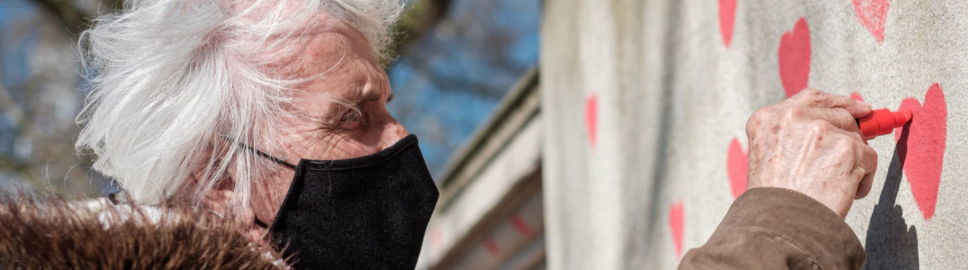
Photo by Ehimetalor Akhere Unuabona on [Unsplash](https://unsplash.com/photos/_fPUzCWxxGA). 

# Heart Disease Classification w/ Random Forest 💌

> ### 📌 Table of Contents:
i. About the Dataset
     * Understanding the dataset
     * Exploratory Data Analysis
     * Data Visualization
ii. Heart Disease Classification Model
     * Random Forest Classifier
     * Data Preprocessing
     * RFC Model
     * Performance
iii. Conclusion

## About the Dataset

### Understanding the Dataset

This original dataset has 76 attributes but this dataset only refers to 14 attributes with the target 
feature being the presence of heart disease in the patient. 0 meaning no presence and 1 being presence.
The 14 attributes are as follows:

* age of patient
* sex of patient (1 = male; 0 = female)
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target -> 0, 1, 2, 3, or 4.

You can learn more about the dataset [here](https://www.kaggle.com/ronitf/heart-disease-uci)!

### Exploratory Data Analysis

In [ ]:
# Importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("../input/heart-disease-uci/heart.csv")

data.head(10)

In [ ]:
data.describe()

In [ ]:
data.shape, data.info()

# Here, we have 303 unique rows for 14 features. 

In [ ]:
data['target'].value_counts()

In [ ]:
# There are slightly more patient values w/ heart disease than there are without. 
# Seeing the numerical values is great, but visualizing it is even better. 

x = ['1', '0']
y = data['target'].value_counts()

sns.barplot(x, y, color='pink')
plt.show()

In [ ]:
def showBinaryFeatureValues(feature1, feature2, feature):
    x = [feature1, feature2]
    y = data[feature].value_counts()
    
    sns.barplot(x, y, color='pink')
    plt.show()
    
showBinaryFeatureValues('male', 'female', 'sex') 
showBinaryFeatureValues('false', 'true', 'fbs')
showBinaryFeatureValues('false', 'true', 'exang')

In [ ]:
# Checking for any null numbers within the dataset.

data.isna().sum()

# There are no n/a values for any of the features within the dataset. 

In [ ]:
# Creating a heat map of correlation between features

correlation = data.corr()

fig=plt.figure(figsize=(12,12))
plt.title('Correlation between Features')
sns.heatmap(correlation, annot= True, cmap='flare')

In [ ]:
# Plotting different distributions 

def plotHeartFeaturesDist(x, x2, x3, x4):
    fig, axes = plt.subplots(1,4, figsize=(25, 5))
    sns.histplot(data, x=x, hue='target', multiple="dodge", kde=True, palette="bwr", ax=axes[0])
    axes[0].set_title("Distribution of {}".format(x))
    sns.histplot(data, x=x2, hue='target', multiple="dodge", kde=True, palette="bwr", ax=axes[1])
    axes[1].set_title("Distribution of {}".format(x2))
    sns.histplot(data, x=x3, hue='target', multiple="dodge", kde=True, palette="bwr", ax=axes[2])
    axes[2].set_title("Distribution of {}".format(x3))
    sns.histplot(data, x=x4, hue='target', multiple="dodge", kde=True, palette="bwr", ax=axes[3])
    axes[3].set_title("Distribution of {}".format(x4))
    
plotHeartFeaturesDist('age', 'trestbps', 'chol', 'thalach')

In [ ]:
# Scatter plots comparing various features to each other 
# Slope + thalachm, cp + thalach, trestbps + age, and age + ca had strong correlations
# so we'll make sure to compare those. 

def plotHeartFeatureScatter(x, y, x2, y2, x3, y3, x4, y4):
    fig, axes = plt.subplots(1,4, figsize=(25, 5))
    sns.scatterplot(data=data, x=x, y=y, hue="target", palette='bwr', ax=axes[0])
    axes[0].set_title("Scatter of {} vs ".format(x, y))
    sns.scatterplot(data=data, x=x2, y=y2, hue="target", palette='bwr', ax=axes[1])
    axes[1].set_title("Scatter of {} vs {}".format(x2, y2))
    sns.scatterplot(data=data, x=x3, y=y3, hue="target", palette='bwr', ax=axes[2])
    axes[2].set_title("Scatter of {} vs {}".format(x3, y3))
    sns.scatterplot(data=data, x=x4, y=y4, hue="target", palette='bwr', ax=axes[3])
    axes[3].set_title("Scatter of {} vs {}".format(x4, y4))

plotHeartFeatureScatter('slope', 'thalach', 'cp', 'thalach', 'trestbps', 'age', 'age', 'ca')

In [ ]:
# Violin plotting visualization

def plotHeartFeatureViolin(x, y, x2, y2, x3, y3):
    fig, axes = plt.subplots(1,3, figsize=(25, 5))
    sns.violinplot(x=x, y=y, data=data, hue=x, palette='bwr', ax=axes[0])
    axes[0].set_title("Violin plot of {} and {}".format(x, y))
    sns.violinplot(x=x2, y=y2, data=data, hue=x2, palette='bwr', ax=axes[1])
    axes[1].set_title("Violin plot of {} and {}".format(x2, y2))
    sns.violinplot(x=x3, y=y3, data=data, hue=x3, palette='bwr', ax=axes[2])
    axes[2].set_title("Violin plot of {} and {}".format(x3, y3))
    
plotHeartFeatureViolin('sex', 'trestbps', 'target', 'thalach', 'sex', 'thalach')

# First row:
# For reference: female = 0 and male = 1. 
# In the first plot, we see that there is more range in trestbps (resting blood pressure) distribution in females than in males. 
# The middle distribution of maximum heart rate achieved is also in a higher range for patients where heart disease is present.
# The distribution frequency for males in thalach is also higher than females.
# In last distribution, we find that there is more range in the male distribution of maximum heart rate achieved than female\

plotHeartFeatureViolin('exang', 'thalach', 'fbs', 'oldpeak', 'thal', 'age')

# Second row:
# For reference: for exercise induced angina 1 = yes; 0 = no
# In the first plot, there is a wider range in distribution in thalach in patients who did not have exercise induced angina. There is also a frequency of higher max 
# heart rate achieved in patients who did not experience exang. 
# In the middle plot, fbs:(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false). If fbs is not greater than 120 mg/dl, oldpeak is most frequent at 0 and has a wider 
# range of distribution than if fasting blood sugar is greater than 120 ml/dl.
# The final plot, 0 thal distribution range is very thin whereas 2 thal is wider. 1 and 3 thal violin distributions are pretty identical.

### Random Forest Classifier

Random Forest is an example of an **ensemble** learning algorithm; the building blocks to a random forest classifier are **decision trees**. (Many of these trees = Forest) It's more powerful than just a single decision tree because it operates as an ensemble of several trees; each of these decision trees make a prediction for one of the classes and these predictions are then averaged for a final prediction. 

RandomForestClassifier() has the following parameters﹡:

* **n_estimators**; number of trees in the forest
* **max_depth**; maximum depth of the trees
* **min_samples_split**; minimum # of samples needed to split an internal node 
* **max_leaf_nodes**; sets a limit to node splitting
* **min_samples_leaf**; minimum # of leaf samples required to be at a leaf node
* **max_sample**; used to determine what amount of data is used to train each individual data
* **max_features**; maximum # of features each tree is given

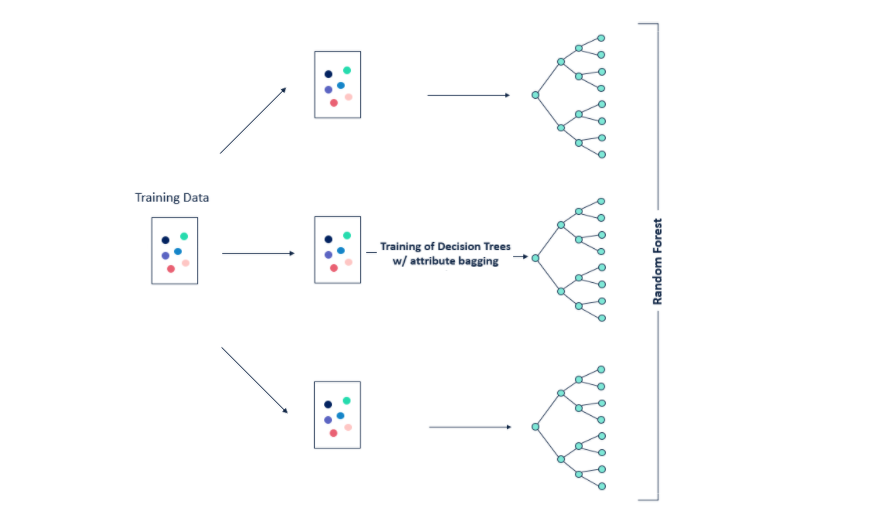
Image edited from [Alteryx](https://community.alteryx.com/t5/Alteryx-Designer-Knowledge-Base/Seeing-the-Forest-for-the-Trees-An-Introduction-to-Random-Forest/ta-p/158062)

True to its name, Random Forest Classifier adds an attribute of randomness into the forest. While growing trees, a random sampling of features are taken into consideration. This is meant to build unique trees so that the random forest classifier averages a diverse variety of predictions. 

﹡These are not all the parameters of RandomForestClassifier(), you can learn more [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). 

In [ ]:
# Data Preprocessing
# All of the values are already numerical so there is no need for any encoding. 

X = data.drop(['target'], axis=1)
Y = data['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
# For now, I've just created a baseline model using mostly sklearn's default values. 
rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, max_leaf_nodes=None, min_samples_leaf=1, max_samples=None, max_features="auto")

rfc.fit(x_train, y_train)

predictions = rfc.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, predictions))

# 78%, not the best accuracy score, let's continue hyper-parameter tuning. 

In [ ]:
# To make the search for the optimal # of trees, we can iterate through a list of range of values and return the max accuracy and # of trees. 

def ListComp():
    return [x for x in range(1, 100)]

n_estimators = ListComp()

accuracies = [] 

for i in n_estimators:                                         
    rfc = RandomForestClassifier(n_estimators=i, max_depth=None, min_samples_split=2, max_leaf_nodes=None, min_samples_leaf=1, max_samples=None, max_features="auto")
    rfc.fit(x_train, y_train)
    predictions = rfc.predict(x_test)
    accuracies.append(metrics.accuracy_score(y_test, predictions))
    
#shows the maximum accuracy
max_acc = max(accuracies)
print(max_acc)

# Using sklearn's classification report to see the precision, recall, and f1 score for our model. 
classification_report(y_test, predictions)

### Conclusion 💌

Heart disease is currently one of the leading causes of death around the world. In the United States, one person dies every [36 seconds](http://www.cdc.gov/heartdisease/facts.htm#:~:text=Heart%20disease%20is%20the%20leading,1%20in%20every%204%20deaths.) from cardiovascular disease. Estimates suggest up that [3.7 million](http://www.pacificmedicalcenters.org/physician-articles/undiagnosed-heart-conditions/#:~:text=Estimates%20suggest%20that%203.7%20million,screenings%20can%20be%20life%20saving). Americans have an undiagnosed heart condition. It's a sobering statistic that creates a strong case for improved heart disease diagnostic methods. 

Artificial Intelligence; machine learning and big data analytics in this specific use case has a lot of potential in the medspace by aiding clinicians with more accurate and faster diagnosis of heart diseases and with the rapidly developing AI ecosystem, I'm personally hopeful to see more use of machine learning in order to save lives. 

Check out some of my other work: 

[Understanding the Amazon with Multi-Label Classification ](https://www.kaggle.com/tenzinmigmar/understanding-the-amazon-from-space-w-mlc)

[Lunar Rocky Landscape Segmentation with U-Net](https://www.kaggle.com/tenzinmigmar/lunar-rocky-landscape-segmentation-with-u-net)

[Classifying Iris Flower Types with K-Means](https://www.kaggle.com/tenzinmigmar/classifying-iris-flower-types-with-k-means)